In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [2]:
wys1617 = gpd.read_file("data/wyssen/SHP_columns/wys1617.shp")
wys1718 = gpd.read_file("data/wyssen/SHP_columns/wys1718.shp")
wys1819 = gpd.read_file("data/wyssen/SHP_columns/wys1819.shp")
wys = gpd.read_file("data/wyssen/SHP_columns/wys.shp")

wys1617_in = gpd.read_file("data/wyssen/SHP_intersect/wys1617_in.shp")
wys1718_in = gpd.read_file("data/wyssen/SHP_intersect/wys1718_in.shp")
wys1819_in = gpd.read_file("data/wyssen/SHP_intersect/wys1819_in.shp")
wys_in = gpd.read_file("data/wyssen/SHP_intersect/wys_in.shp")

In [16]:
sataut1617 = gpd.read_file("data/satskred/SHP/AvalDet_1617_aut.shp")
sataut1718 = gpd.read_file("data/satskred/SHP/AvalDet_1718_aut.shp")
sataut1819 = gpd.read_file("data/satskred/SHP/AvalDet_1819_aut.shp")

DriverError: data/satskred/SHP/AvalDet_aut_Merge_sataut.shp: No such file or directory

In [18]:
sataut_gdf = gpd.read_file("data/satskred/SHP_merge/AvalDet_aut_Merge_sataut.shp")

In [3]:
wysman = gpd.read_file("result/match_wysman/wysman.shp")
wysman_path = gpd.read_file("result/match_wysman/edit/Wys_33_selection_edit.shp")
satman = gpd.read_file("result/match_satman/satman.shp")
sataut = gpd.read_file("result/match_sataut/satskred_det_1.shp")

In [26]:
# Order and labels
month_order=[11, 12, 1, 2, 3, 4, 5]

size_order=['S1 [10 m]', 'S1.5', 'S2 [100 m]', 'S2.5', 'S3 [1000 m]', 'S3.5', 'S4 [2000 m]']
size_labels=['D1','D1.5','D2','D2.5','D3','D3.5','D4']

snow_order = ['D - Dry snow', 'M - Moist snow', 'W - Wet snow']
snow_labels = ['Dry', 'Moist', 'Wet']

path_order = ['torv1', 'torv2', 'torv3', 'torv4', 'torv5', 'skog1', 'skog2', 'skog3', 'skiheisen', 'lango', 'stol1', 'stol2', 'tyinstolenbrattheng', 'mel1', 'mel2', 'melvikebrattheng', 'varden']
path_labels = ['torv1', 'torv2', 'torv3', 'torv4', 'torv5', 'skog1', 'skog2', 'skog3', 'skiheisen', 'lango', 'stol1', 'stol2', 'tyinstolenbrattheng', 'mel1', 'mel2', 'melvikebrattheng', 'varden']

type_labels = ['Slab avalanche', 'Loose-snow avalanche', 'Loose-snow + slab', 'Cornice fall', 'Cornice fall + slab', 'Ice fall', 'Ice fall + slab']
type_order = ['S - Slab avalanche', 'L - Loose-snow avalanche', 'LS - Loose-snow + slab', 'C - Cornice fall', 'CS - Cornice fall + slab', 'I - Ice fall', 'IS - Ice fall + slab']

satpath_labels = ['37', '44', '110', '117']
satpath_order = ['37', '44', '110', '117']

# Colors
blue = ['C3', 'C0']
orange = ['C3', 'C1']
green = ['C3', 'C2']
red_grey = ['C3', 'lightgrey']

# Colors for size
D1 = ['C0']
D15 = ['C1']
D2 = ['C2']
D25 = ['C3']
D3 = ['C4']
D35 = ['C5']
D4 = ['C6']

# Color palettes
blue_p = 'Blues_r'
orange_p = 'Oranges_r'
green_p = 'Greens_r'
red_p = 'Reds_r'
grey_p = 'Greys_r'
paired_p = 'Paired'

In [27]:
for col in sataut_gdf.columns:
   print(col)
   

area
aspect
det_count
east
length
north
raster_val
sat_geom
source
t_0
t_1
time
track_id
uuid
width
dem_mean
dem_median
dem_min
dem_max
slp_mean
slp_median
slp_min
slp_max
vv1_mean
vv1_median
vv1_min
vv1_max
vh1_mean
vh1_median
vh1_min
vh1_max
vv0_mean
vv0_median
vv0_min
vv0_max
vh0_mean
vh0_median
vh0_min
vh0_max
Shape_Leng
Shape_Area
refdate
detectdate
nr
sa_polyid
sm_polyid
path
poly_match
geometry
d
year
month
day


In [28]:
a = 'sat_geom'
#b = 'path'
#hu = 'season'
ord = satpath_order
labels = satpath_labels
xlabel = "Satellite path"
ylabel = "Count"
range = 4

df = sataut_gdf
pal = red_grey
#col = ['C2']
title = "Satellite paths"
#l_title = "Season"
file = "./figures/sataut_satgeo.png"

In [21]:
df["d"] = pd.to_datetime(df["t_1"])
df["year"] = df['d'].dt.year
df["month"] = df['d'].dt.month
df["day"] = df['d'].dt.day

In [23]:
#palette=pal,
cp = sb.countplot(x=a, order=ord, palette=col, data=df).set_title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(np.arange(range), labels)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(file)

ValueError: geometry is not a valid palette name

ValueError: Invalid RGBA argument: 'd'

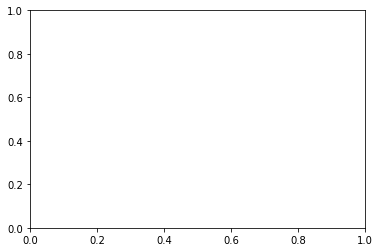

In [31]:
# Remember to change "size()" in first line
# cp_stack = df.groupby(['poly_match', a]).size().reset_index().pivot(columns='poly_match', index=a, values=0).loc[ord]

cp_stack = df.groupby(['poly_match', a]).size().reset_index().pivot(columns='poly_match', index=a, values=0).loc[ord]
cp_stack.plot(kind='bar', stacked=True, color=col).set_title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(np.arange(range), labels)
plt.xticks(rotation=45)
plt.legend(['Match', 'No match'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(file)

In [37]:
wys_size = sb.countplot(x=a, hue=hu, order=ord, data=df).set_title((title))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(np.arange(range), labels)
plt.legend(['16/17', '17/18', '18/19'], title=l_title, loc='upper right')
plt.tight_layout()
plt.savefig(file)

ValueError: Could not interpret input 'season'

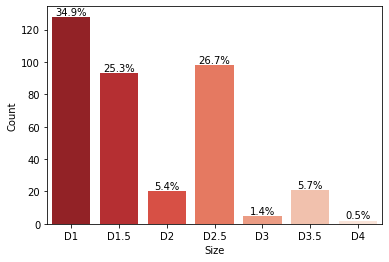

In [35]:
total = float(len(df))
ax = sb.countplot(x=a, palette=pal, data=df) # for Seaborn version 0.7 and more
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(np.arange(range), labels)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

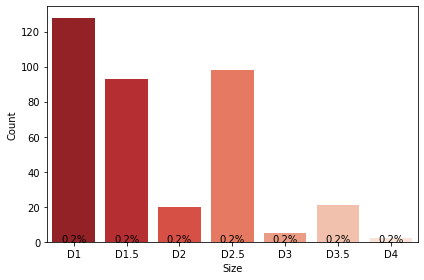

In [27]:
# Percentage with %-symbol, labels on top of bars
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
            ha='center', va='bottom')

# Percentage in comma, labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

c:\AnacondaNVE\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


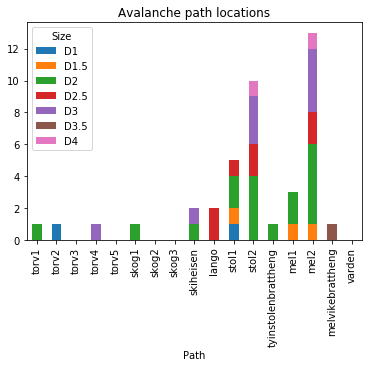

In [7]:
df_plot = df.groupby([a, b]).size().reset_index().pivot(columns=a, index=b, values=0)
df_plot.loc[ord].plot(kind='bar', stacked=True, color=[D1, D15, D2, D25, D3, D35, D4])
plt.legend(['D1', 'D1.5', 'D2', 'D2.5', 'D3', 'D3.5', 'D4'], title=l_title, loc='best')
plt.title(title)
plt.xlabel(xlabel)
#plt.ylabel(ylabel)
#plt.tight_layout()
#plt.figure(figsize=(20,10))
plt.savefig(file, bbox_inches='tight')
plt.show()


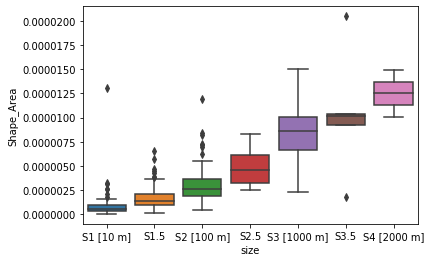

In [97]:
sb.boxplot( y=wys["Shape_Area"], x=wys["size"], order=size_order)

In [65]:
#pd.set_option('display.max_rows', wys1718["size"].shape[0]+1)
#print(wys1718["size"])

0       S2 [100 m]
1        S1 [10 m]
2        S1 [10 m]
3        S1 [10 m]
4        S1 [10 m]
5       S2 [100 m]
6             S1.5
7        S1 [10 m]
8      S3 [1000 m]
9             S1.5
10       S1 [10 m]
11            S1.5
12      S2 [100 m]
13       S1 [10 m]
14      S2 [100 m]
15       S1 [10 m]
16      S2 [100 m]
17      S2 [100 m]
18       S1 [10 m]
19      S2 [100 m]
20            S1.5
21       S1 [10 m]
22       S1 [10 m]
23       S1 [10 m]
24      S2 [100 m]
25            S1.5
26            S2.5
27            S1.5
28            S1.5
29            S1.5
30            S1.5
31            S1.5
32            S1.5
33            S1.5
34            S2.5
35            S1.5
36            S1.5
37       S1 [10 m]
38            S1.5
39            S1.5
40      S2 [100 m]
41            S1.5
42      S2 [100 m]
43            S2.5
44            S1.5
45      S2 [100 m]
46            S1.5
47            S1.5
48            S1.5
49            S1.5
50            S1.5
51            S1.5
52          

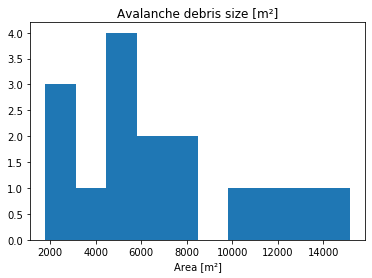

In [29]:
c = sataut[a]
counts, bins = np.histogram(c)
plt.hist(bins[:-1], bins, weights=counts)
plt.title(title)
plt.xlabel(xlabel)
#plt.ylabel(ylabel)
plt.savefig(file)

In [30]:
print(sataut[a])

0      4987.762637
1      6683.657926
2      5187.262860
3      8279.665412
4     15162.784623
5     11771.080986
6      2294.388895
7      2593.655941
8      5586.427493
9      4089.958479
10     4488.987667
11     7282.132473
12    10274.878362
13     6484.151683
14     1795.592448
15    13466.921200
Name: area, dtype: float64
